In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
t, m, g, l, w, a, b, c, alpha = smp.symbols(r't m g l w a b c \alpha')

the2,the1 =  smp.symbols(r'\theta_1, \theta_2 ', cls=smp.Function)

the1 = the1(t)
the1_d = smp.diff(the1, t)
the1_dd = smp.diff(the1_d, t)

the2 = the2(t)
the2_d = smp.diff(the2, t)
the2_dd = smp.diff(smp.diff(the2, t), t)

x1, y1, x2, y2 = smp.symbols('x_1, y_1, x_2, y_2', cls=smp.Function)
x1= x1(t, the1)
y1= y1(t, the1)
x2= x2(t, the1, the2)
y2= y2(t, the1, the2)

In [3]:
x1 = a*smp.sin(w*t)+l*smp.sin(the1)
y1 = -l*smp.cos(the1)
x2 = a*smp.sin(w*t)+l*smp.sin(the1) + l*smp.sin(the2)
y2 = -l*smp.cos(the1) -l*smp.cos(the2)

vx1_f = smp.lambdify((t,w,l,a,the1,the2,the1_d,the2_d), smp.diff(x1, t))
vx2_f = smp.lambdify((t,w,l,a,the1,the2,the1_d,the2_d), smp.diff(x2, t))
vy1_f = smp.lambdify((t,w,l,a,the1,the2,the1_d,the2_d), smp.diff(y1, t))
vy2_f = smp.lambdify((t,w,l,a,the1,the2,the1_d,the2_d), smp.diff(y2, t))

T = 1/2* m * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2) + 1/2 * m  *(smp.diff(x2, t)**2 +  smp.diff(y2, t)**2)
V = m*g*y1 + m*g*y2
L = T-V

We have neglected the effect of damping for this case. So we will not find the Rayleigh Dissipation Constant.

In [4]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)
LE1 = LE1.simplify()

In [5]:
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)
LE2 = LE2.simplify()

In [6]:
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),simplify=False, rational=False)

In [7]:
sols[the1_dd]

0.25*a*w**2*sin(t*w)*cos(\theta_1(t) - \theta_2(t))*cos(\theta_1(t))/(0.25*l*cos(\theta_1(t) - \theta_2(t))**2 - 0.5*l) - 0.5*a*w**2*sin(t*w)*cos(\theta_2(t))/(0.25*l*cos(\theta_1(t) - \theta_2(t))**2 - 0.5*l) - 0.25*g*sin(\theta_1(t))*cos(\theta_1(t) - \theta_2(t))/(0.25*l*cos(\theta_1(t) - \theta_2(t))**2 - 0.5*l) + 0.5*g*sin(\theta_2(t))/(0.25*l*cos(\theta_1(t) - \theta_2(t))**2 - 0.5*l) - 0.25*l*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2/(0.25*l*cos(\theta_1(t) - \theta_2(t))**2 - 0.5*l) - 0.25*l*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(0.25*l*cos(\theta_1(t) - \theta_2(t))**2 - 0.5*l)

In [8]:
sols[the2_dd]

1.0*a*w**2*sin(t*w)*cos(\theta_1(t) - \theta_2(t))*cos(\theta_2(t))/(0.5*l*cos(\theta_1(t) - \theta_2(t))**2 - 1.0*l) - 1.0*a*w**2*sin(t*w)*cos(\theta_1(t))/(0.5*l*cos(\theta_1(t) - \theta_2(t))**2 - 1.0*l) + 1.0*g*sin(\theta_1(t))/(0.5*l*cos(\theta_1(t) - \theta_2(t))**2 - 1.0*l) - 1.0*g*sin(\theta_2(t))*cos(\theta_1(t) - \theta_2(t))/(0.5*l*cos(\theta_1(t) - \theta_2(t))**2 - 1.0*l) + 0.5*l*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(0.5*l*cos(\theta_1(t) - \theta_2(t))**2 - 1.0*l) + 1.0*l*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2/(0.5*l*cos(\theta_1(t) - \theta_2(t))**2 - 1.0*l)

In [9]:
a = LE1.subs([(smp.sin(the1-the2), the1-the2),
         (smp.cos(the1-the2), 1),
         (smp.cos(the1), 1),
         (smp.sin(the1), the1),
         (the1, c*smp.sin(w*t)),
         (the2, c*alpha*smp.sin(w*t)),
         (m, 1),
         (l,1),(a,0.1),
         ]).doit().series(c, 0, 2).removeO().simplify()
b = LE2.subs([(smp.sin(the1-the2), the1-the2),
         (smp.cos(the1-the2), 1),
         (smp.cos(the1), 1),
         (smp.cos(the2), 1),
         (smp.sin(the1), the1),
         (smp.sin(the2), the2), 
         (the1, c*smp.sin(w*t)),
         (the2, c*alpha*smp.sin(w*t)),
         (m, 1),
         (l,1),(a,0.1),
         ]).doit().series(c, 0, 2).removeO().simplify()

In [10]:
b.args[1]

a*w**2 + c*(-\alpha*g + \alpha*w**2 + w**2)

In [11]:
a.args[0]

c*(1.0*\alpha*w**2 - 2.0*g + 2.0*w**2) + 0.2*w**2

In [12]:
soln = smp.solve([a.args[0], b.args[1]], (w, alpha))

In [13]:
soln[0][0]

-2.23606797749979*sqrt(c*g*(-2.0 - 1.4142135623731*(a*c + c**2 + 0.005)**0.5/c - 0.1/c)/(5.0*a - 5.0*c - 1.0))

In [14]:
soln[0][1]

-1.4142135623731*sqrt(a*c + c**2 + 0.005)/c - 0.1/c

In [15]:
soln[1][0]

2.23606797749979*sqrt(c*g*(-2.0 - 1.4142135623731*(a*c + c**2 + 0.005)**0.5/c - 0.1/c)/(5.0*a - 5.0*c - 1.0))

In [16]:
soln[1][1]

-1.4142135623731*sqrt(a*c + c**2 + 0.005)/c - 0.1/c

In [17]:
tau = smp.symbols(r'\tau')
w1 = smp.limit(soln[0][0].subs(c,tau/l).simplify(), tau,smp.oo)
w2 = smp.limit(soln[0][1].subs(c,tau/l).simplify(), tau,smp.oo)
w3 = smp.limit(soln[1][0].subs(c,tau/l).simplify(), tau,smp.oo)
w4 = smp.limit(soln[1][1].subs(c,tau/l).simplify(), tau,smp.oo)

In [18]:
w1

-1.84775906502257*sqrt(g)

In [19]:
w2

-1.4142135623731*l*sqrt(l**(-2))

In [20]:
w3

1.84775906502257*sqrt(g)

In [21]:
w4

-1.4142135623731*l*sqrt(l**(-2))

'soln' here are the normal modes of the system. At one particular frequency, the bobs will be in phase with each other and at other frequency, they will be out of phase with each other.

In [22]:
# dz1dt_f = smp.lambdify((t, m, g, w, l, a, the1, the2, the1_d, the2_d), sols[the1_dd])
# dthe1dt_f = smp.lambdify(the1_d, the1_d)

# dz2dt_f = smp.lambdify((t, m, g, w, l, a, the1, the2, the1_d, the2_d), sols[the2_dd])
# dthe2dt_f = smp.lambdify(the2_d, the2_d)


# def dSdt(S, t):
#     the1, z1, the2, z2 = S
#     return [
#         dthe1dt_f(z1),
#         dz1dt_f(t, m, g, w, l, a,c, alpha, the1, the2, z1, z2),
#         dthe2dt_f(z2),
#         dz2dt_f(t, m, g, w, l, a,c, alpha, the1, the2, z1, z2),
#     ]
# #Some numerical values to get a solution

# t = np.linspace(0, 50, 1000)
# g = 9.81
# m=1
# l = 1
# a = 0.1
# w = np.sqrt(g/l)
# ans = odeint(dSdt, y0=[0, 0, 0, 0], t=t)

In [23]:
import numpy as np
from scipy.integrate import odeint
import sympy as sp

# Define the symbolic variables
t, m, g, w, l, a, c, alpha, the1, the2, the1_d, the2_d = sp.symbols('t m g w l a c alpha the1 the2 the1_d the2_d')

# Define the symbolic expressions for the derivatives (replace this with your actual expressions)
sols = {the1_dd: sp.sin(the1), the2_dd: sp.cos(the2)}

# Lambdify the symbolic expressions
dz1dt_f = sp.lambdify((t, m, g, w, l, a, c, alpha, the1, the2, the1_d, the2_d), sols[the1_dd])
dthe1dt_f = sp.lambdify(the1_d, the1_d)

dz2dt_f = sp.lambdify((t, m, g, w, l, a, c, alpha, the1, the2, the1_d, the2_d), sols[the2_dd])
dthe2dt_f = sp.lambdify(the2_d, the2_d)

def dSdt(S, t):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, m, g, w, l, a, c, alpha, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, m, g, w, l, a, c, alpha, the1, the2, z1, z2),
    ]

# Some numerical values to get a solution
t = np.linspace(0, 50, 1000)
g = 9.81
m = 1
l = 20
a = 1
w = np.sqrt(g/l)
ans = odeint(dSdt, y0=[0, 0, 0, 0], t=t)


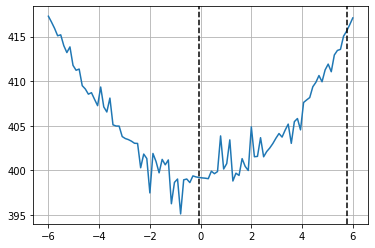

In [29]:
def get_energy(w):
    t = np.linspace(0, 100, 2000)
    ans = odeint(dSdt, y0=[0.1, 0.1, 0, 0], t=t)
    vx1 = vx1_f(t,w,l,a,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    vx2 = vx2_f(t,w,l,a,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    vy1 = vy1_f(t,w,l,a,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    vy2 = vy2_f(t,w,l,a,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    E = 1/2 * np.mean(vx1**2+vx2**2+vy1**2+vy2**2) 
    return E

ws = np.linspace(-6, 6, 100)
Es = np.vectorize(get_energy)(ws) 
#Plot the kinetic energy of the system for different values of 

plt.plot(ws, Es)
plt.axvline(5.785, c='k', ls='--')
plt.axvline(-0.0707, c='k', ls='--')
# Tautochrone
#plt.axvline(np.sqrt(np.pi*g**(-1/2)), c='k', ls='--')
plt.grid()

In [25]:
t = np.linspace(0, 200, 20000)
g = 9.81
m=1
l = 20
a = 1
w = ws[ws<0][np.argmax(Es[ws<0])]
ans = odeint(dSdt, y0=[0.1, 0.1, 0, 0], t=t)

def get_x0y0x1y1x2y2(t, the1, the2, l, a):
    return (np.sin(w*t),
            0*t,
            np.sin(w*t) + l*np.sin(the1),
            -l*np.cos(the1),
            np.sin(w*t) + l*np.sin(the1) + l*np.sin(the2),
            -l*np.cos(the1) - l*np.cos(the2),
    )

x0, y0, x1, y1, x2, y2 = get_x0y0x1y1x2y2(t, ans.T[0], ans.T[2], l, a)

C:\Users\gupt1\AppData\Local\Temp/ipykernel_20648/1129266618.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ln2, = ax.plot([], [], 'ro-',markersize = 8, alpha=0.05, color='cyan')   # line for Earth
C:\Users\gupt1\AppData\Local\Temp/ipykernel_20648/1129266618.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ln3, = ax.plot([], [], 'ro-',markersize = 8,alpha=0.05, color='cyan')


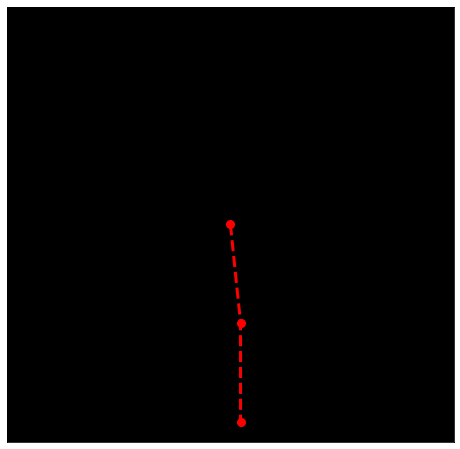

In [26]:
def animate(i):
    ln1.set_data([x0[::10][i], x1[::10][i], x2[::10][i]], [y0[::10][i], y1[::10][i], y2[::10][i]])
    trail1 = 50            # length of motion trail of weight 1 
    trail2 = 50            # length of motion trail of weight 2
    ln2.set_data(x1[::10][i:max(1,i-trail1):-1], y1[::10][i:max(1,i-trail1):-1])   # marker + line of first weight
    ln3.set_data(x2[::10][i:max(1,i-trail2):-1], y2[::10][i:max(1,i-trail2):-1])   # marker + line of the second weight
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln2, = ax.plot([], [], 'ro-',markersize = 8, alpha=0.05, color='cyan')   # line for Earth
ln3, = ax.plot([], [], 'ro-',markersize = 8,alpha=0.05, color='cyan')
ax.set_ylim(-44,44)
ax.set_xlim(-44,44)
ani = animation.FuncAnimation(fig, animate, frames=2000, interval=50)
ani.save('pen.gif',writer='pillow',fps=50)